In [1]:
from PIL import ImageFont, ImageDraw
from PIL import Image
from PIL import ImageDraw

In [2]:
import matplotlib.pyplot as plt
import urllib
import os
%matplotlib inline

In [3]:
from zipfile import ZipFile
import glob
import shutil

In [4]:
font_links = ['https://fonts.google.com/specimen/Oswald',
'https://fonts.google.com/specimen/Roboto',
'https://fonts.google.com/specimen/Open+Sans',
'https://fonts.google.com/specimen/Ubuntu',
'https://fonts.google.com/specimen/PT+Serif',
'https://fonts.google.com/specimen/Dancing+Script',
'https://fonts.google.com/specimen/Fredoka+One',
'https://fonts.google.com/specimen/Arimo',
'https://fonts.google.com/specimen/Noto+Sans',
'https://fonts.google.com/specimen/Patua+One']
print('No of Links:',len(font_links))

No of Links: 10


# Download Fonts

In [5]:
parent_dir = os.getcwd()

In [6]:
if 'FontsFolder' not in os.listdir(parent_dir):
        os.makedirs(os.path.join(parent_dir,'FontsFolder'))
        print('Fonts Folder created')

Fonts Folder created


In [7]:
### Download fonts and extract to Fonts Folder
def download_ttf(font_name,save_path):
    #font_name = url.split('/')[-1]
    download_url = 'https://fonts.google.com/download?family='+font_name
    font_zip = urllib.request.urlopen(download_url)
    with open(os.path.join(save_path,font_name+'.zip'),'wb') as output:
          output.write(font_zip.read())
    print('Downloaded font: ',font_name,'\t',end='')
"""sample_font = 'Farro'
sample_save_path = parent_dir
download_ttf('Farro',sample_save_path)
if sample_font+'.zip' not in os.listdir(sample_save_path):
    print('Error in downloading fonts')36"""

"sample_font = 'Farro'\nsample_save_path = parent_dir\ndownload_ttf('Farro',sample_save_path)\nif sample_font+'.zip' not in os.listdir(sample_save_path):\n    print('Error in downloading fonts')36"

In [8]:
def extract_zip(font_name,zip_path,save_path):
    extracted = False
    with ZipFile(zip_path, 'r') as zipObj:
        # Get a list of all archived file names from the zip
        listOfFileNames = zipObj.namelist()
        """if font_name+'-VariableFont_wght.ttf' in listOfFileNames:
            fileName = 'static/'+font_name+'-Regular.ttf'
            zipObj.extract(fileName, save_path)
            print('Extracted ',fileName)
        else:
            fileName = font_name+'-Regular.ttf'
            zipObj.extract(fileName, save_path)
            print('Extracted ',fileName)"""
        for i in listOfFileNames:
            if i.endswith('-Regular.ttf'):
                #print(i)
                zipObj.extract(i, save_path)
                if 'static' in i:
                    shutil.move(save_path+'/'+i,save_path+'/'+font_name+'-Regular.ttf')
                extracted = True
    if extracted:
        print('Extraction Succesfull')
    else:
        print('Extraction UnSuccesfull')

In [9]:
def get_fonts(font_list,parent_directory):
    fonts_folder = os.path.join(parent_directory,'FontsFolder')
    zip_save_directory = os.path.join(fonts_folder,'Temp')
    if zip_save_directory not in os.listdir(fonts_folder):
        os.makedirs(zip_save_directory)
    for i in font_list:
        font_name = i.split('/')[-1]
        download_ttf(font_name,zip_save_directory)
        zip_path = os.path.join(zip_save_directory,font_name+'.zip')
        extract_zip(font_name,zip_path,fonts_folder)
    #shutil.rmtree(zip_save_directory)
    if 'static' in os.listdir(fonts_folder):
        shutil.rmtree(os.path.join(fonts_folder,'static'))

In [10]:
get_fonts(font_links,parent_dir)

Downloaded font:  Oswald 	Extraction Succesfull
Downloaded font:  Roboto 	Extraction Succesfull
Downloaded font:  Open+Sans 	Extraction Succesfull
Downloaded font:  Ubuntu 	Extraction Succesfull
Downloaded font:  PT+Serif 	Extraction Succesfull
Downloaded font:  Dancing+Script 	Extraction Succesfull
Downloaded font:  Fredoka+One 	Extraction Succesfull
Downloaded font:  Arimo 	Extraction Succesfull
Downloaded font:  Noto+Sans 	Extraction Succesfull
Downloaded font:  Patua+One 	Extraction Succesfull


# Text Image Visualization

In [11]:
fontsN = len(font_links)
if fontsN%2 == 0:
    N_Rows = fontsN//2
    N_Columns = N_Rows
else:
    N_Rows = fontsN//2
    N_Columns = N_Rows + 1  
image_size = (128,128)

In [12]:
def draw_image(font_path,image_size):
    image = Image.new("RGB", image_size, (255, 255, 255))
    draw = ImageDraw.Draw(image)
    font_size = 15
    # use a truetype font
    font = ImageFont.truetype(font_path, font_size)
    hw_l = font.getlength("Hello World")
    H,W = image_size
    draw.text((W/2-hw_l/2,H/2-font_size), "Hello World", font=font,fill=(0,0,0))
    return image

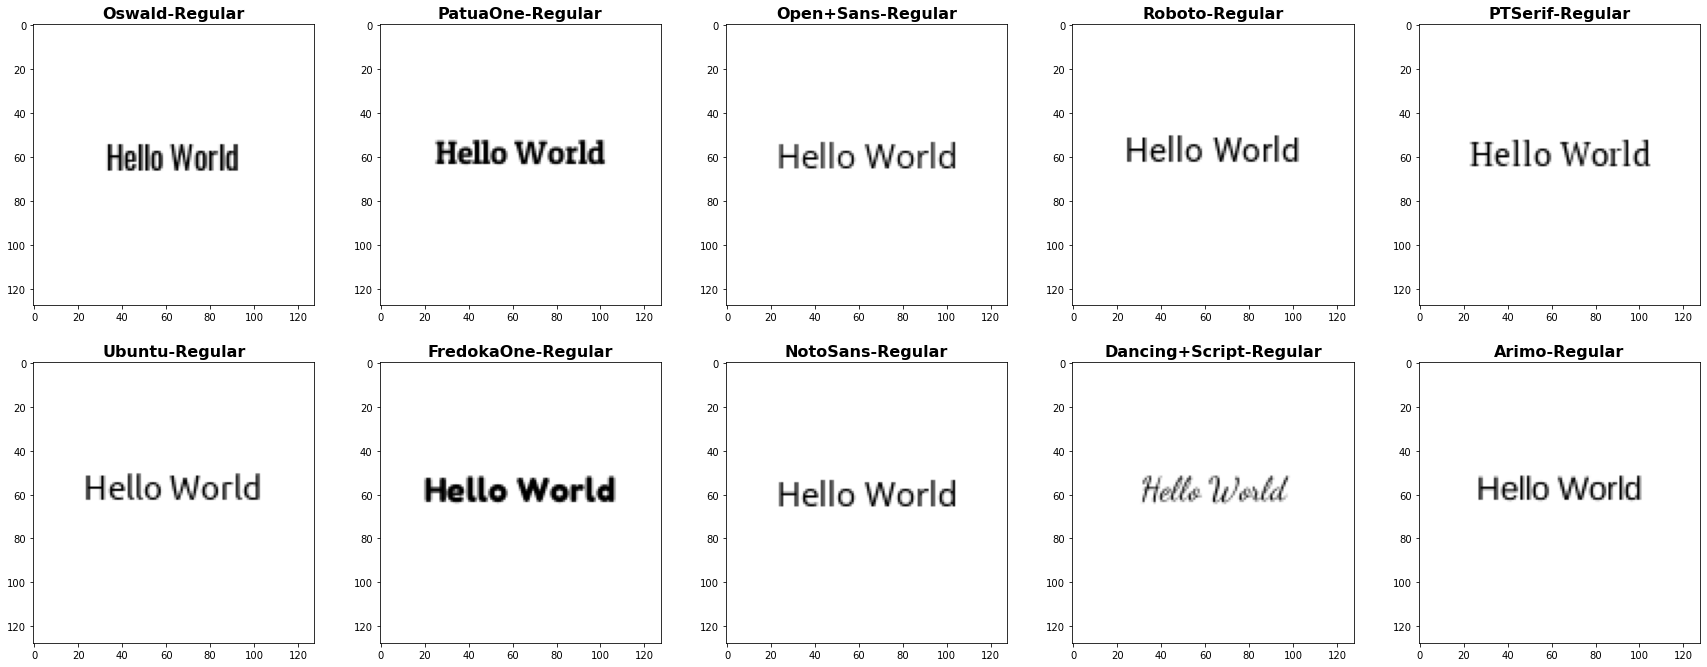

In [13]:
fonts_folder = os.path.join(parent_dir,'FontsFolder')
pltIndex = 1
fig = plt.figure(figsize=(30,30))
for i in glob.glob(fonts_folder+'/*.ttf'):
    plt.subplot(N_Rows,N_Columns,pltIndex)
    image = draw_image(i,image_size)
    plt.imshow(image)
    font_name = i.split('/')[-1].split('.')[0]
    plt.title(font_name,fontdict={'fontsize':16,'fontweight': 'bold',})
    pltIndex +=1